In [1]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit
import matplotlib.pyplot as plt

In [2]:
city, base_emergency_rate, base_population = main.configure_city_file('configuration.txt')

Didn't receive either rate or base population. Running the simulation using  default values of rate and population


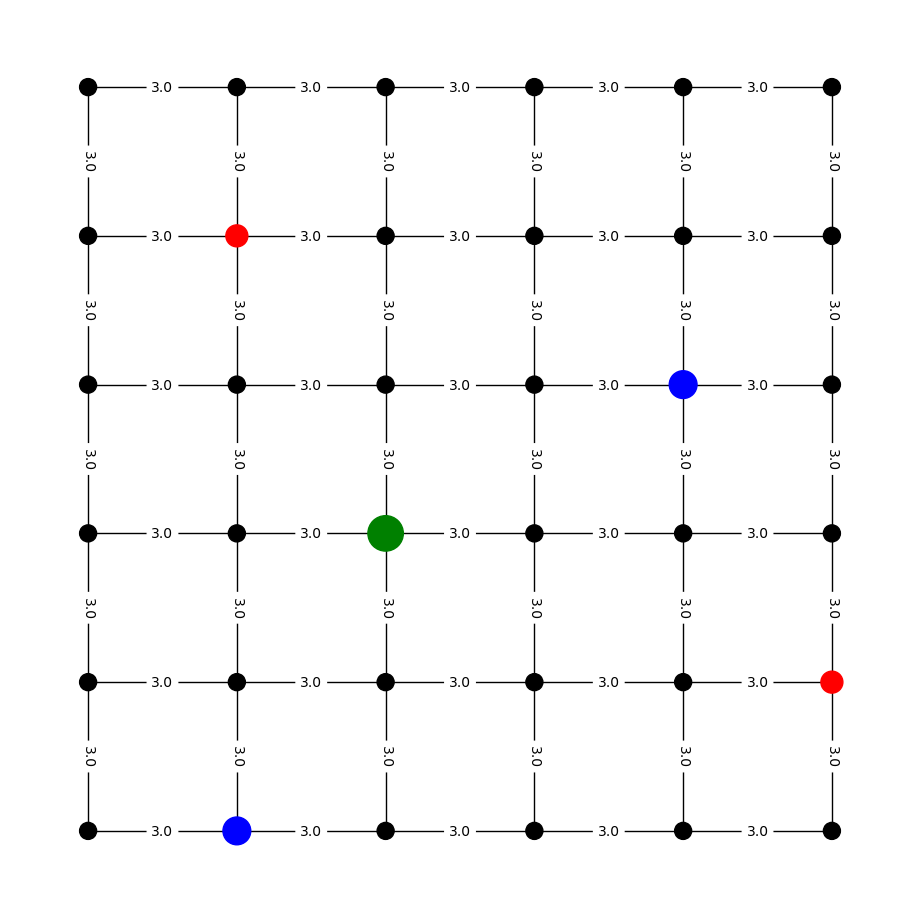

In [3]:
units = EmergencyUnit.response_buildings
small_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
medium_unit_locs = [unit.location for unit in units if unit.available_capacity==5]
large_unit_locs = [unit.location for unit in units if unit.available_capacity==7]

color_map = dict()
size_map = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in small_unit_locs:
        color_map[node_coordinates[i]] = 'red'
        size_map[node_coordinates[i]] = 250
    elif node_coordinates[i] in medium_unit_locs:
        color_map[node_coordinates[i]] = 'blue'
        size_map[node_coordinates[i]] = 400
    elif node_coordinates[i] in large_unit_locs:
        color_map[node_coordinates[i]] = 'green'
        size_map[node_coordinates[i]] = 650
    else:
        color_map[node_coordinates[i]] = 'black'
        size_map[node_coordinates[i]] = 150
colors = [ color_map.get(node) for node in city.city_graph.nodes]
sizes = [ size_map.get(node) for node in city.city_graph.nodes]
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
plt.figure(1, figsize=(9,9))
nx.draw(city.city_graph, pos, node_size=sizes, node_color = colors)
a=nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels, font_size=10)
plt.show()

In [4]:
resp_times, successful_perc, num_emergencies, plotting_emergency_dict = main.simulate(city, base_emergency_rate, 
                                                                                      base_population)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:37<00:00,  2.17s/it]


Average Response Time: 6.82 mins
Average Percentage of Successfully Responded Emergencies: 80.5 %


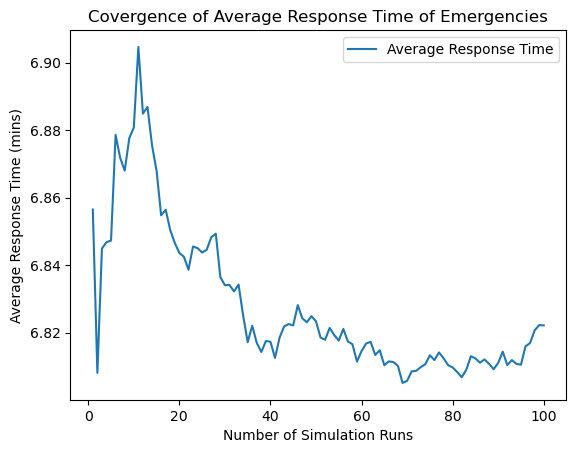

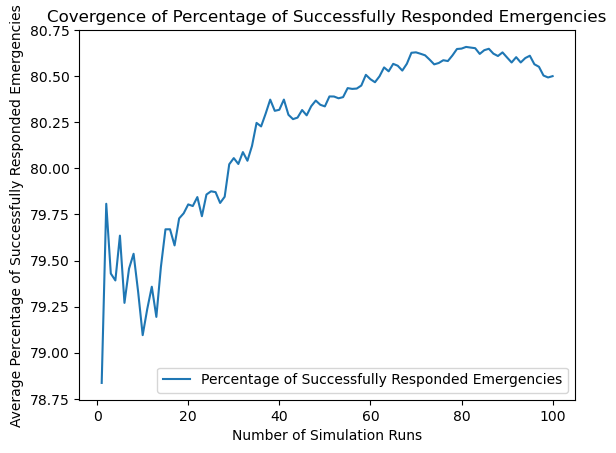

In [5]:
df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
df1.to_csv('results/demo_resptime.csv')
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, 
                   index = [_ for _ in range(1, 101)])
plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
df2.to_csv('results/demo_percsuccessful.csv')
print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

In [6]:
node_coordinates=list(city.city_graph.nodes)
node_identifier = [{} for key in plotting_emergency_dict]
color_map= [{} for key in plotting_emergency_dict]
edges_to_draw = [[] for key in plotting_emergency_dict]
size = [{} for key in plotting_emergency_dict]
counter = 0
units_to_plot = [unit.location for unit in units]
for emergency in plotting_emergency_dict:
    units_to_show = plotting_emergency_dict[emergency]
    for i in range(len(node_coordinates)):
        if node_coordinates[i] == emergency:
            color_map[counter][node_coordinates[i]] = "red"
            node_identifier[counter][node_coordinates[i]] = "E"
            size[counter][node_coordinates[i]] = 200
        elif node_coordinates[i] in units_to_plot:
            color_map[counter][node_coordinates[i]] = "green"
            node_identifier[counter][node_coordinates[i]] = "EU"
            size[counter][node_coordinates[i]] = 200
        else:
            color_map[counter][node_coordinates[i]] = "black"
            size[counter][node_coordinates[i]] = 100
    for unit in units_to_show:
        path = nx.shortest_path(city.city_graph, source=emergency, target=unit)
        path_edges = list(zip(path, path[1:]))
        for p in path_edges:
            edges_to_draw[counter].append(p)
    counter += 1

## Visualization of locations of first three emergencies and emergency units from which teams were dispatched to resolve emergency, and the path taken by the teams to reach the location of emergency. If emergency occurs at the same coordinate location as an emergency unit, no path will be shown.

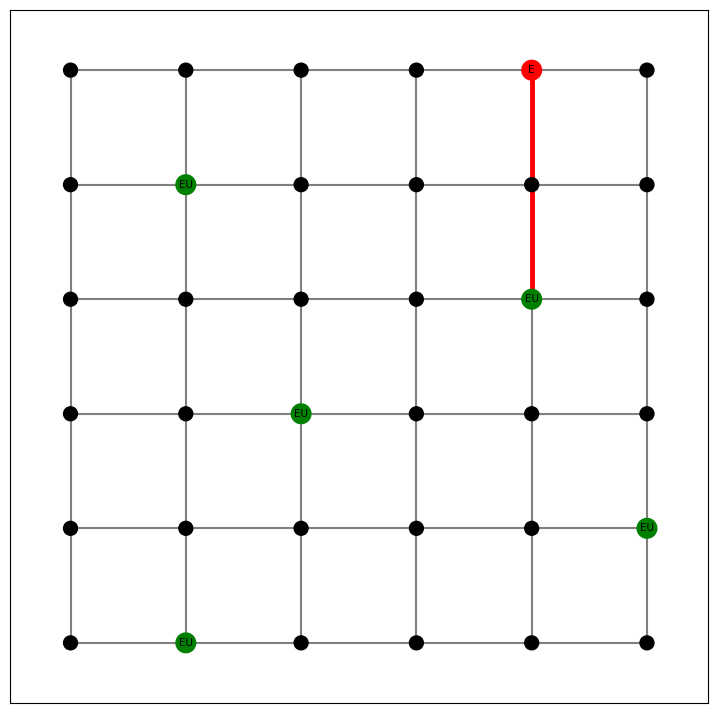

In [7]:
obs = 0
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
sizes = [size[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = sizes)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='grey',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=3.5)
plt.show()

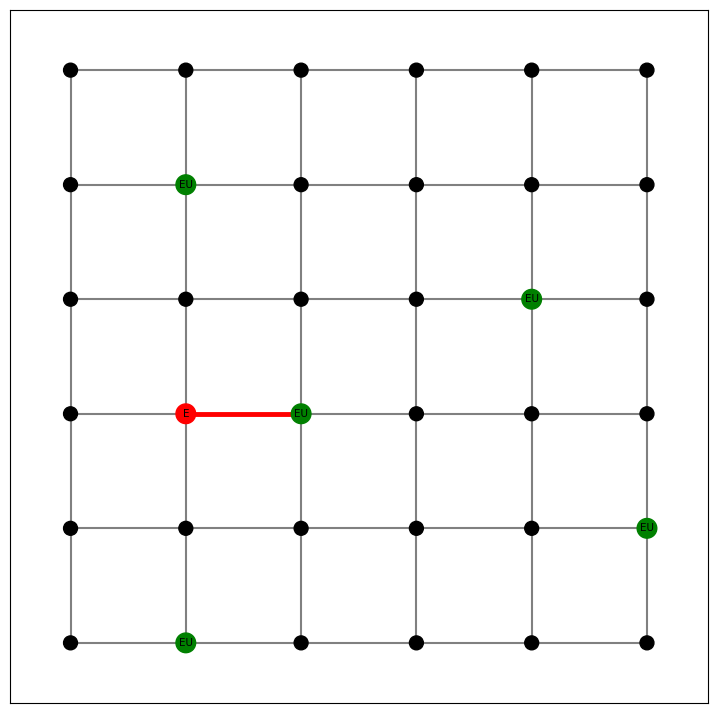

In [8]:
obs = 1
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
sizes = [size[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = sizes)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='grey',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=3.5)
plt.show()

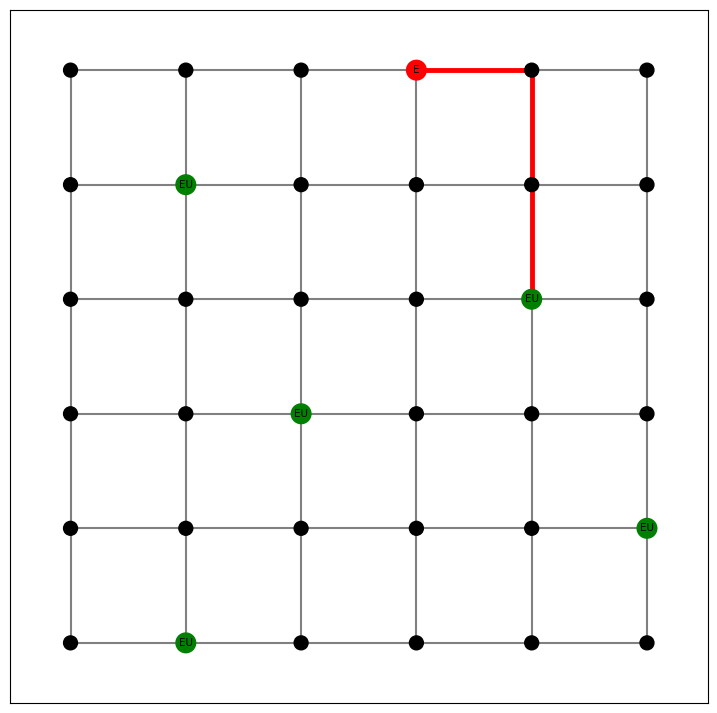

In [9]:
obs = 2
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
sizes = [size[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = sizes)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='grey',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=3.5)
plt.show()